In [1]:
from config import *
from map_wrapper import *

In [20]:
print(f"{year}-{month:02}")

2020-04


In [3]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
from mpl_toolkits.basemap import Basemap

In [4]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [5]:
conn=db.get_conn()

In [6]:

cities = """
('北京','上海','深圳','杭州','广州','南京','苏州','成都','东莞','西安','武汉','天津','长沙',
'宁波','福州','大连','重庆','青岛','济南','合肥','长春','昆明','郑州','沈阳','哈尔滨','厦门')
"""
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and city in {cities}", con=conn)


In [7]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [ ]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['job_description']
del data['job_id']

In [13]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['平均工资']=salary_mean
    sub_data['最低工资']=salary_95_min
    sub_data['中位数']=salary_median
    sub_data['最高工资']=salary_95_max
    sub_data['招聘人数']=count
    sub_data['百分比']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='平均工资', ascending=False)

    return sub_data

data_format={"百分比":"{:.2%}","平均工资":"{:.0f}","中位数":"{:.0f}","最低工资":"{:.0f}","最高工资":"{:.0f}"}

translate_dict={}


# 程序员工资

In [14]:
data_city=get_sub_stats_by_col(data,'city')
data_city['排名']=list(range(1,data_city.shape[0]+1))
data_city=data_city[['排名', 'city', '平均工资', '最低工资', '中位数', '最高工资', '招聘人数', '百分比']]
data_city.style.format(data_format)

,排名,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
3,1,北京,18246,5250,16000,45000,30892,9.24%
0,2,上海,17060,6500,15000,40000,59059,17.67%
2,3,深圳,16784,6500,15000,37500,46645,13.96%
7,4,杭州,16017,5658,14000,37500,18898,5.65%
10,5,广州,14800,5250,12500,30000,41262,12.35%
9,6,武汉,13610,5000,12500,27000,15863,4.75%
1,7,南京,13525,5250,12500,27500,18589,5.56%
5,8,大连,13495,4500,11500,32500,10904,3.26%
19,9,东莞,13096,5000,12500,27500,3827,1.15%
6,10,苏州,12737,4500,12083,27500,9273,2.77%


In [15]:
data_city.columns

Index(['排名', 'city', '平均工资', '最低工资', '中位数', '最高工资', '招聘人数', '百分比'], dtype='object')

In [16]:
describe(data_city,'程序员')

ValueError: Unknown format code 'f' for object of type 'str'

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1] of <class 'int'>

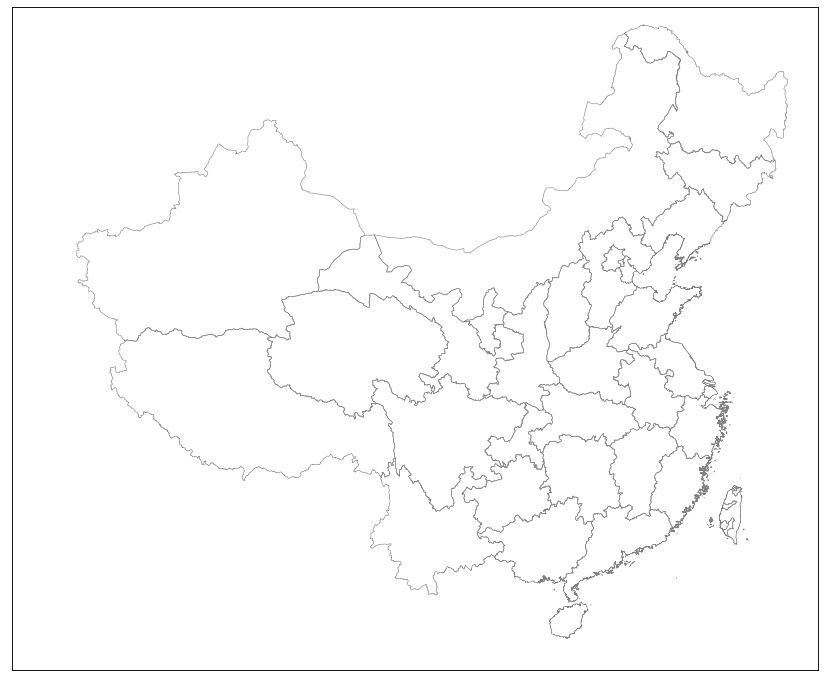

In [18]:
draw_city_map(data_city,2000,f'{year}年{month}月中国大陆主要城市程序员工资')

# 区块链工程师

In [ ]:
data_blockchain=get_sub_stats_by_col(data[(data.expert_blockchain==1)],'city')

data_blockchain.style.format(data_format)

In [ ]:
describe(data_blockchain,'区块链工程师')

In [ ]:
draw_city_map(data_blockchain[data_blockchain['招聘人数']>10],10,f'{year}年{month}月中国大陆主要城市区块链工程师工资')

# 机器学习工程师

In [ ]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='机器学习'],'city')
data_city_algorithm.style.format(data_format)

In [ ]:
describe(data_city_algorithm,'机器学习')

In [ ]:
draw_city_map(data_city_algorithm,100,f'{year}年{month}月中国大陆主要城市机器学习工资')

# 系统架构师

In [ ]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'city')
data_city_architect.style.format(data_format)

In [ ]:
describe(data_city_architect,'系统架构师')

In [ ]:
draw_city_map(data_city_architect,40,f'{year}年{month}月中国大陆主要城市【架构师】工资')

# 生物信息工程师

In [19]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'city')
data_bio.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比


In [ ]:
describe(data_bio,'生物信息工程师')

In [9]:
draw_city_map(data_bio,2,f'{year}年{month}月中国大陆主要城市【生物信息工程师】工资')

NameError: name 'data_bio' is not defined

# 爬虫工程师

In [10]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'city')
data_spider=data_spider[data_spider['招聘人数']>10]
data_spider.style.format(data_format)

NameError: name 'get_sub_stats_by_col' is not defined

In [11]:
describe(data_spider, '爬虫工程师')

NameError: name 'data_spider' is not defined

In [12]:
draw_city_map(data_spider,5,f'{year}年{month}月中国大陆主要城市【爬虫工程师】工资')

NameError: name 'data_spider' is not defined

# Java程序员

In [28]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'city')
data_java.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
3,北京,18035,7000,15000,42712,7910,9.67%
1,深圳,17336,7000,15000,40000,9758,11.93%
4,上海,17323,7000,15500,37500,14429,17.64%
10,杭州,16263,6554,14500,40000,4616,5.64%
6,广州,14498,6000,12500,30000,9926,12.13%
0,南京,13599,5250,12500,27500,5450,6.66%
7,大连,13497,4624,11000,35000,3718,4.55%
17,东莞,12645,5250,12500,23178,543,0.66%
2,成都,12406,4912,11500,27500,3232,3.95%
5,武汉,12146,5250,11000,26000,3395,4.15%


In [29]:
describe(data_java, 'Java程序员')

2020年4月北京招收Java程序员7910人。2019年4月北京Java程序员平均工资18035元，工资中位数15000元，其中95%的人的工资介于7000元到42712元。

2020年4月深圳招收Java程序员9758人。2019年4月深圳Java程序员平均工资17336元，工资中位数15000元，其中95%的人的工资介于7000元到40000元。

2020年4月上海招收Java程序员14429人。2019年4月上海Java程序员平均工资17323元，工资中位数15500元，其中95%的人的工资介于7000元到37500元。

2020年4月杭州招收Java程序员4616人。2019年4月杭州Java程序员平均工资16263元，工资中位数14500元，其中95%的人的工资介于6554元到40000元。

2020年4月广州招收Java程序员9926人。2019年4月广州Java程序员平均工资14498元，工资中位数12500元，其中95%的人的工资介于6000元到30000元。

2020年4月南京招收Java程序员5450人。2019年4月南京Java程序员平均工资13599元，工资中位数12500元，其中95%的人的工资介于5250元到27500元。

2020年4月大连招收Java程序员3718人。2019年4月大连Java程序员平均工资13497元，工资中位数11000元，其中95%的人的工资介于4624元到35000元。

2020年4月东莞招收Java程序员543人。2019年4月东莞Java程序员平均工资12645元，工资中位数12500元，其中95%的人的工资介于5250元到23178元。

2020年4月成都招收Java程序员3232人。2019年4月成都Java程序员平均工资12406元，工资中位数11500元，其中95%的人的工资介于4912元到27500元。

2020年4月武汉招收Java程序员3395人。2019年4月武汉Java程序员平均工资12146元，工资中位数11000元，其中95%的人的工资介于5250元到26000元。

2020年4月苏州招收Java程序员1923人。2019年4月苏州Java程序员平均工资12127元，工资中位数11500元，其中95%的人的工资介于5000元到25000元。

2020年4月西安招

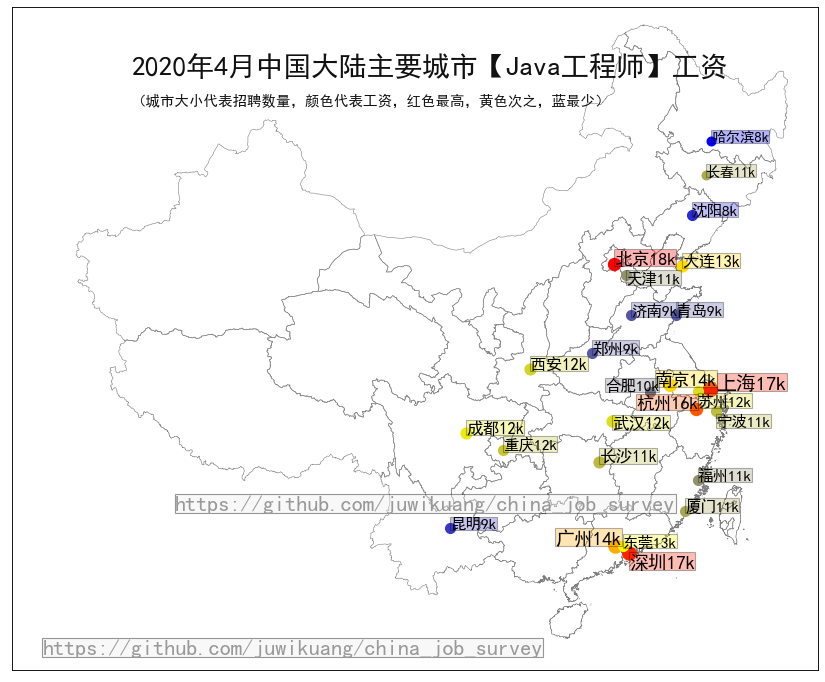

In [30]:
draw_city_map(data_java, 500, f'{year}年{month}月中国大陆主要城市【Java工程师】工资')

In [43]:
history_data = pd.read_sql(sql='select * from CityStats', con=conn)

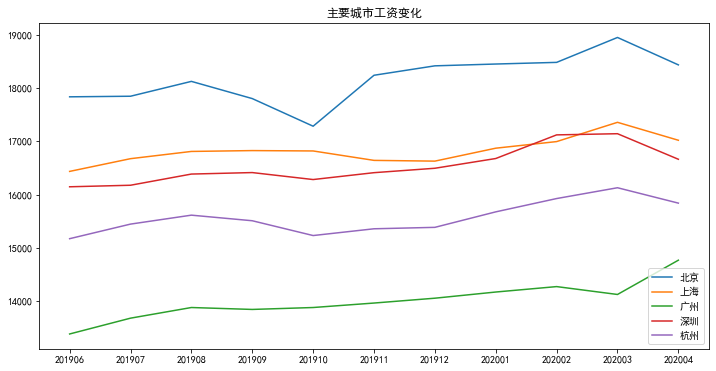

In [44]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
plt.figure(figsize=(12,6))
cities = set(history_data.City)
cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    plt.plot("Month","Salary",data=history_data[history_data.City==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend()
plt.show()

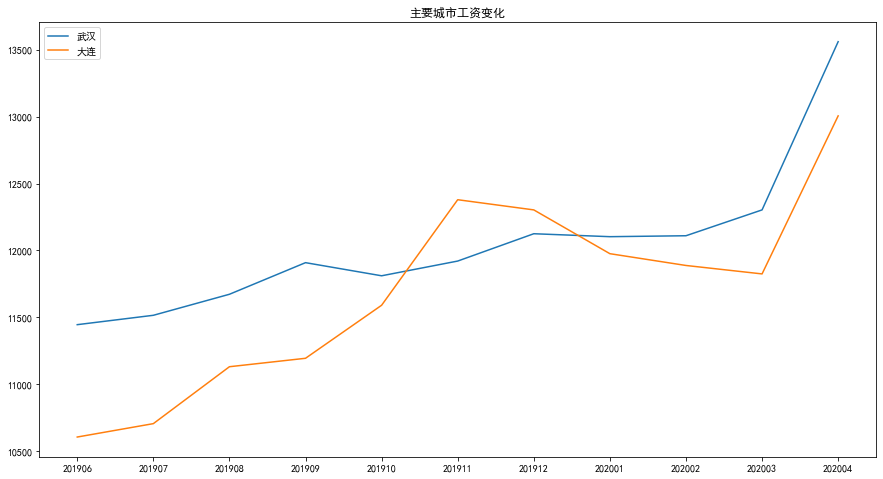

In [45]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
plt.figure(figsize=(15,8))
cities = set(history_data.City)
#cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    values=history_data[history_data.City==city]['Salary'].values
    if abs(values[-1]-values[-2])>1000:
        plt.plot("Month","Salary",data=history_data[history_data.City==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend( loc='upper left')
plt.show()

In [27]:
values=history_data[history_data.City==city]['Salary'].values